In [1]:
import pandas as pd
import warnings
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

In [2]:
def adf_test(timeseries):
    result = adfuller(timeseries)
    statics = result[0]
    p_val = result[1]
    return statics,p_val

In [3]:
def kpss_test(timeseries):
    result = kpss(timeseries)
    statics = result[0]
    p_val = result[1]
    return statics , p_val

In [11]:
# 변동성 확인
def graph_sh(df) :
    fig = plt.figure(figsize = (20,20))
    for i in range(len(df.columns)):
        ax = fig.add_subplot(6,4,i+1)
        ax.plot(df.iloc[:,i])
        ax.set_title(df.columns[i])
        ax.axhline(0, 0, 200, color='red', linestyle='--', linewidth=2)
        a_result = adf_test(df.iloc[:,i])[1]
        k_result = kpss_test(df.iloc[:,i])[1]
        if (a_result < 0.05) and (k_result > 0.05) :
            print(f"{df.columns[i]} adf_p_val: {a_result:.3f}, kpss_result: {k_result:.3f} -> 정상성")
        elif (a_result > 0.05) or (k_result < 0.05) :
            print(f"{df.columns[i]} adf_p_val: {a_result:.3f}, kpss_result: {k_result:.3f} -> 비정상성")
    plt.show()

In [12]:
parents = pd.read_csv('대주주일별수익률.csv',index_col = 0)
child = pd.read_csv('리츠일별수익률.csv',index_col = 0)
df = pd.concat([parents,child],axis = 1)

SK㈜ adf_p_val: 0.000, kpss_result: 0.100 -> 정상성
롯데쇼핑 adf_p_val: 0.000, kpss_result: 0.100 -> 정상성
HD현대 adf_p_val: 0.000, kpss_result: 0.100 -> 정상성
서부티앤디 adf_p_val: 0.000, kpss_result: 0.100 -> 정상성
하나금융지주 adf_p_val: 0.000, kpss_result: 0.100 -> 정상성
모두투어 adf_p_val: 0.000, kpss_result: 0.100 -> 정상성
SK디앤디 adf_p_val: 0.000, kpss_result: 0.100 -> 정상성
SK리츠 adf_p_val: 0.000, kpss_result: 0.100 -> 정상성
롯데리츠 adf_p_val: 0.000, kpss_result: 0.100 -> 정상성
코람코라이프인프라리츠 adf_p_val: 0.000, kpss_result: 0.100 -> 정상성
신한서부티앤디리츠 adf_p_val: 0.000, kpss_result: 0.100 -> 정상성
코람코더원리츠 adf_p_val: 0.000, kpss_result: 0.100 -> 정상성
스타리츠 adf_p_val: 0.000, kpss_result: 0.069 -> 정상성
디앤디플랫폼리츠 adf_p_val: 0.000, kpss_result: 0.084 -> 정상성
미래에셋글로벌치ㅡ adf_p_val: 0.000, kpss_result: 0.100 -> 정상성
NH올원리츠 adf_p_val: 0.000, kpss_result: 0.100 -> 정상성
ESR켄달스퀘어리츠 adf_p_val: 0.000, kpss_result: 0.100 -> 정상성
제이알글로벌리츠 adf_p_val: 0.000, kpss_result: 0.100 -> 정상성
이지스레지던스리츠 adf_p_val: 0.000, kpss_result: 0.100 -> 정상성
이지스벨류리츠 adf_p_val: 0.000,

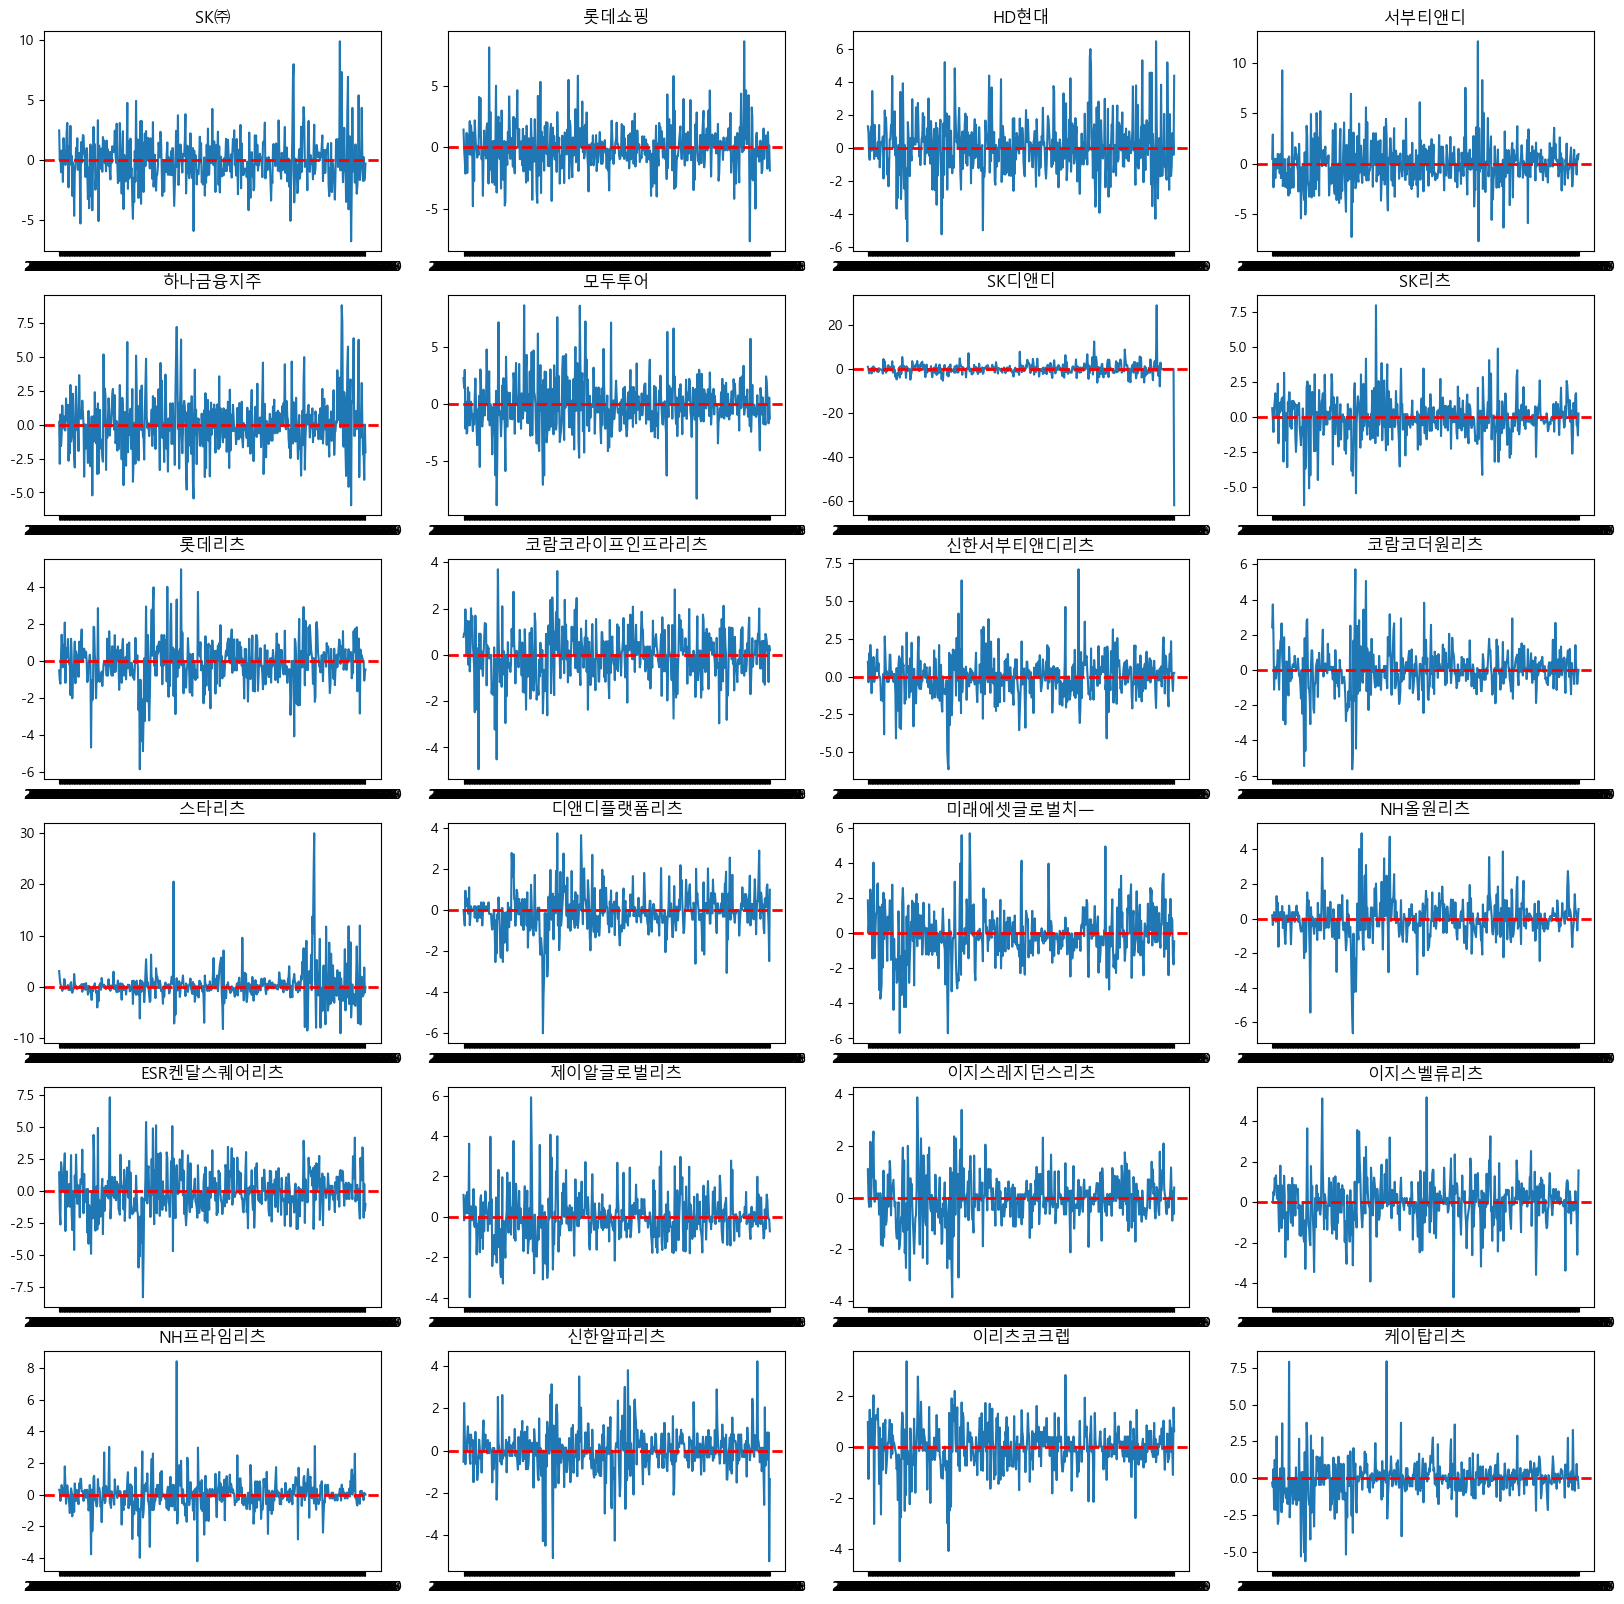

In [13]:
graph_sh(df)

In [24]:
df_1 = pd.concat([df['케이탑리츠'],df['케이탑리츠'].diff().dropna()], axis = 1).dropna()

케이탑리츠 adf_p_val: 0.000, kpss_result: 0.010 -> 비정상성
케이탑리츠 adf_p_val: 0.000, kpss_result: 0.100 -> 정상성


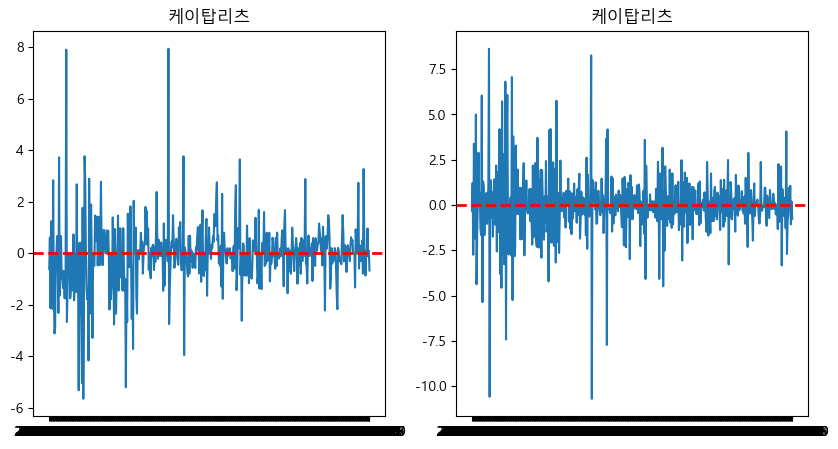

In [25]:
fig = plt.figure(figsize = (10,5))
for i in range(len(df_1.columns)):
    ax = fig.add_subplot(1,2,i+1)
    ax.plot(df_1.iloc[:,i])
    ax.set_title(df_1.columns[i])
    ax.axhline(0, 0, 200, color='red', linestyle='--', linewidth=2)
    a_result = adf_test(df_1.iloc[:,i])[1]
    k_result = kpss_test(df_1.iloc[:,i])[1]
    if (a_result < 0.05) and (k_result > 0.05) :
        print(f"{df_1.columns[i]} adf_p_val: {a_result:.3f}, kpss_result: {k_result:.3f} -> 정상성")
    elif (a_result > 0.05) or (k_result < 0.05) :
        print(f"{df_1.columns[i]} adf_p_val: {a_result:.3f}, kpss_result: {k_result:.3f} -> 비정상성")
    
plt.show()

In [26]:
reits = pd.read_csv('리츠로그수익률_real.csv',index_col = 0)
enp = pd.read_csv('기업로그수익률_real.csv',index_col = 0)

In [27]:
log_df = pd.concat([reits,enp],axis = 1)

SK리츠 adf_p_val: 0.000, kpss_result: 0.100 -> 정상성
롯데리츠 adf_p_val: 0.000, kpss_result: 0.100 -> 정상성
코람코라이프인프라리츠 adf_p_val: 0.000, kpss_result: 0.100 -> 정상성
신한서부티앤디리츠 adf_p_val: 0.000, kpss_result: 0.100 -> 정상성
코람코더원리츠 adf_p_val: 0.000, kpss_result: 0.100 -> 정상성
스타리츠 adf_p_val: 0.000, kpss_result: 0.089 -> 정상성
디앤디플랫폼리츠 adf_p_val: 0.000, kpss_result: 0.083 -> 정상성
미래에셋글로벌치ㅡ adf_p_val: 0.000, kpss_result: 0.100 -> 정상성
NH올원리츠 adf_p_val: 0.000, kpss_result: 0.100 -> 정상성
ESR켄달스퀘어리츠 adf_p_val: 0.000, kpss_result: 0.100 -> 정상성
제이알글로벌리츠 adf_p_val: 0.000, kpss_result: 0.100 -> 정상성
이지스레지던스리츠 adf_p_val: 0.000, kpss_result: 0.100 -> 정상성
이지스벨류리츠 adf_p_val: 0.000, kpss_result: 0.100 -> 정상성
NH프라임리츠 adf_p_val: 0.000, kpss_result: 0.100 -> 정상성
신한알파리츠 adf_p_val: 0.000, kpss_result: 0.100 -> 정상성
이리츠코크렙 adf_p_val: 0.000, kpss_result: 0.100 -> 정상성
케이탑리츠 adf_p_val: 0.000, kpss_result: 0.010 -> 비정상성
롯데쇼핑 adf_p_val: 0.000, kpss_result: 0.100 -> 정상성
HD현대 adf_p_val: 0.000, kpss_result: 0.100 -> 정상성
서부티앤디 adf_p_val:

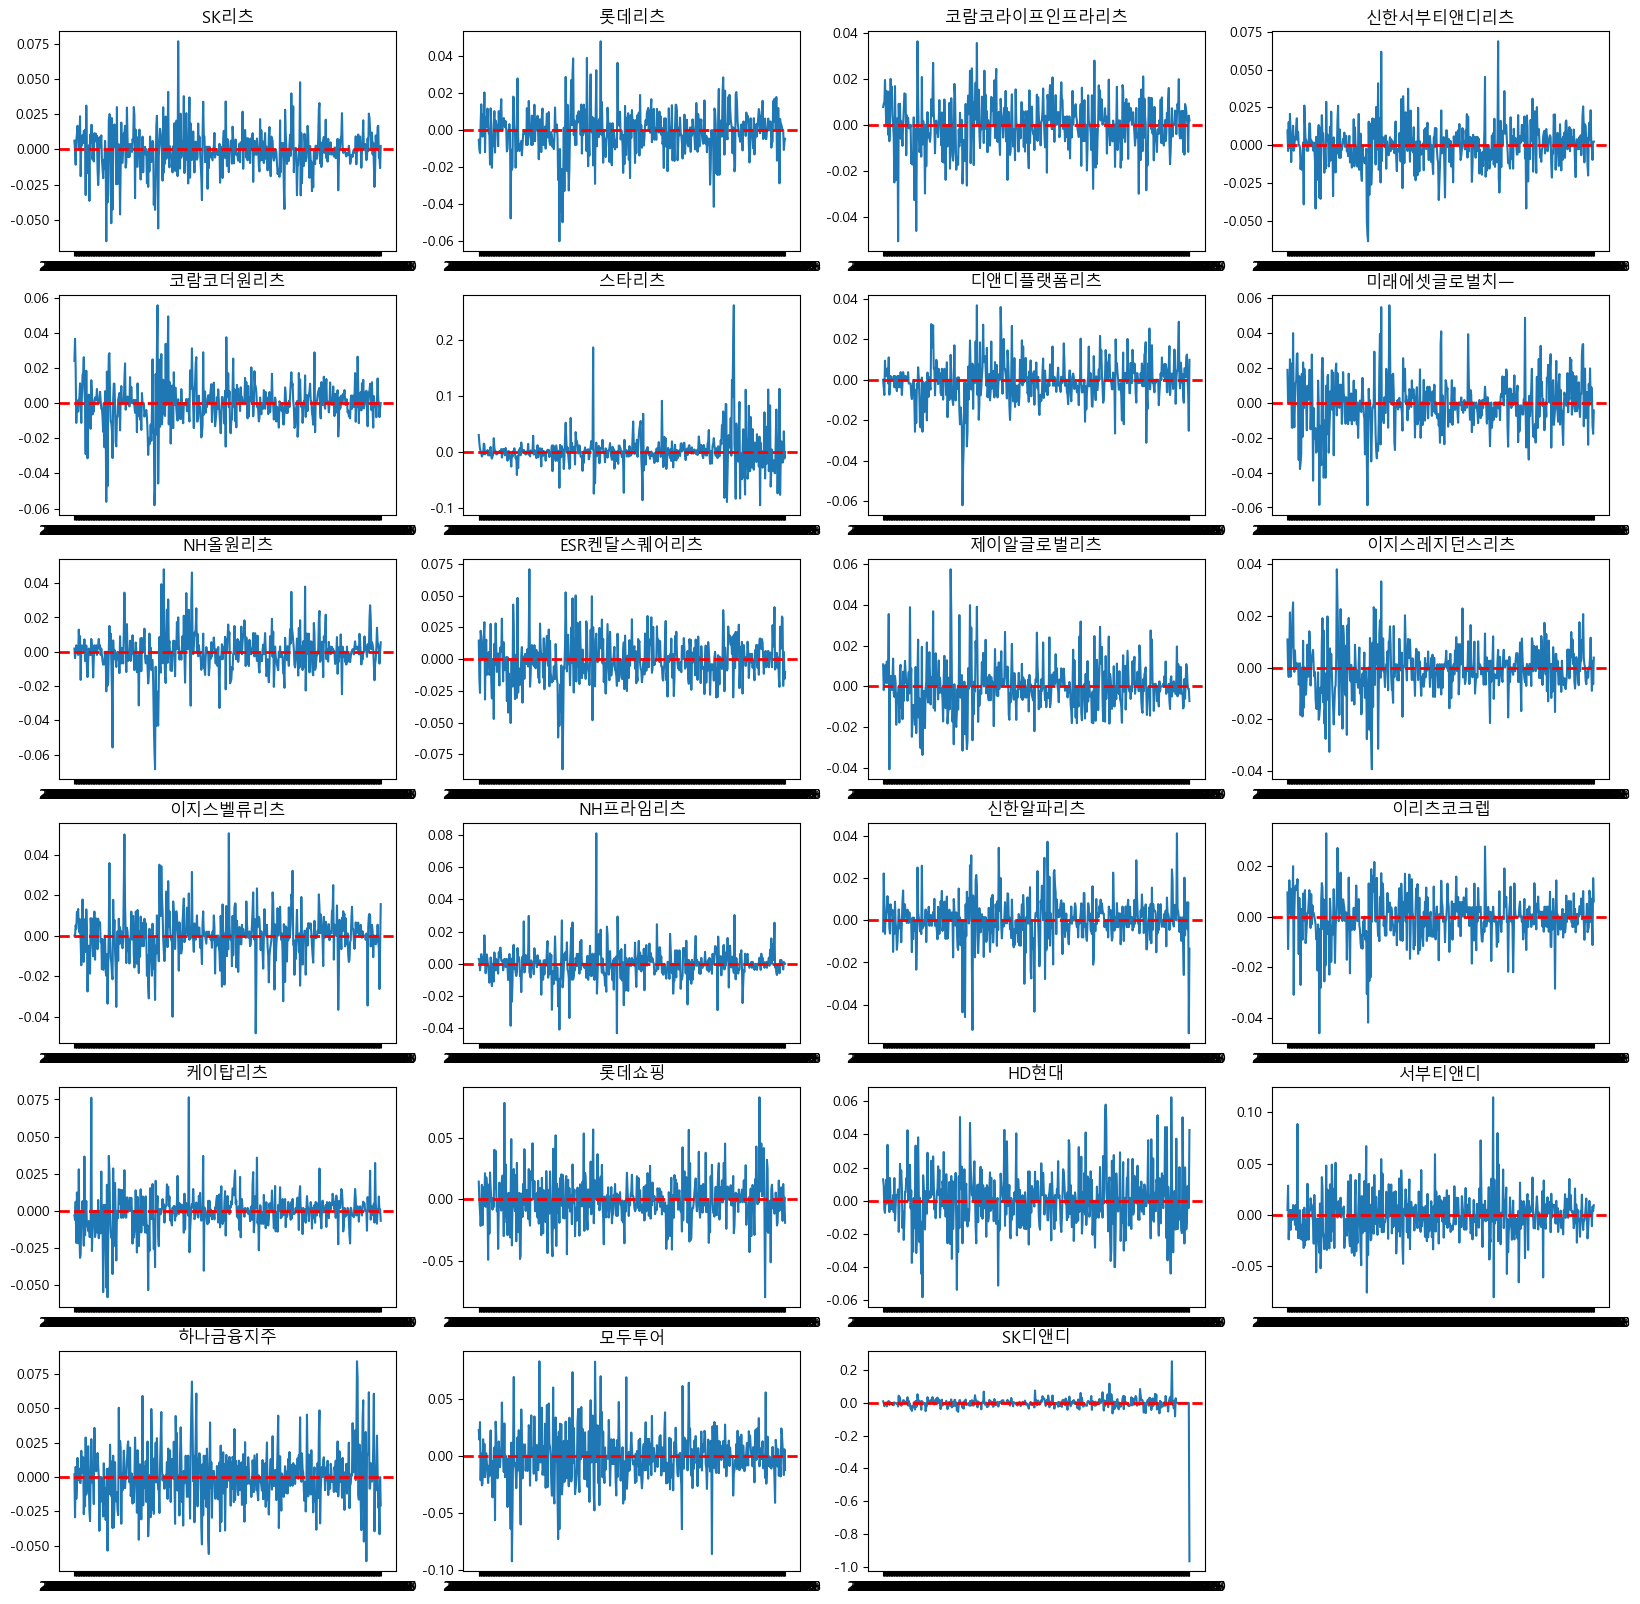

In [28]:
graph_sh(log_df)